# Introduction to Regression with Neural Networks in TensorFlow

Simple definition : predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating data to view and fit

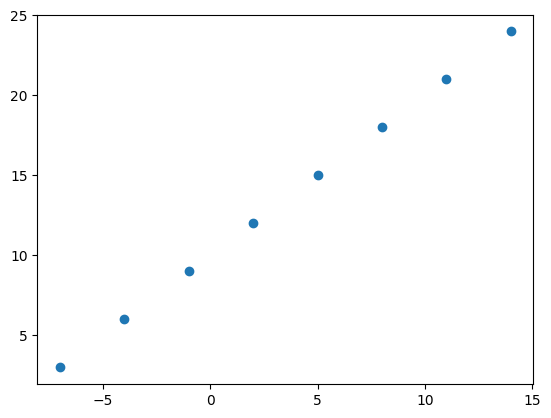

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

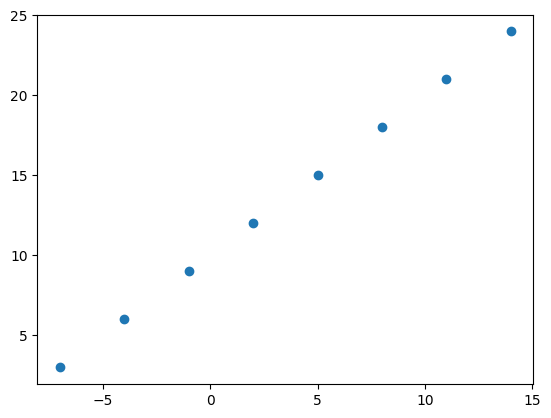

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) 

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - loss: 8.0376 - mae: 8.0376
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.9051 - mae: 7.9051
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.7726 - mae: 7.7726
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.6401 - mae: 7.6401
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.5076 - mae: 7.5076


In [25]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [27]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
# y_pred = model.predict([17.0])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[29.556707]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [30]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
# model.fit(X, y, epochs=100)
# model.fit(X, y, epochs=100)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - loss: 8.2804 - mae: 8.2804
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 8.1479 - mae: 8.1479
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.0154 - mae: 8.0154
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.8829 - mae: 7.8829
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.7504 - mae: 7.7504
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 7.6179 - mae: 7.6179
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 7.4854 - mae: 7.4854
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 7.4475 - mae: 7.4475
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.4419 - mae: 7.4419
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7.4362 - mae: 7.4362
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.4306 - mae: 7.4306
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 7.4250 - mae: 7.4250
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/st

In [31]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [35]:
# Let's see if our model's prediction has improved...
# model.predict([17.0])
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[30.28471]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              # optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=100) 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.1761 - mae: 11.1761
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 10.3927 - mae: 10.3927
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.6052 - mae: 9.6052
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 8.8109 - mae: 8.8109
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 8.0080 - mae: 8.0080
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 7.1940 - mae: 7.1940
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 6.9986 - mae: 6.9986
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 7.4316 - mae: 7.4316
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 7.7127 - mae: 7.7127
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 7.8735 - mae: 7.8735
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 7.7854 - mae: 7.7854
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 7.5217 - mae: 7.5217
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step 

In [39]:
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[26.764715]], dtype=float32)